In [1]:
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants as c
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import integrate
from scipy import special
from scipy.stats import binned_statistic

### Part 1: Loading and Plotting the Data

#### A.

In [2]:
data = pd.read_csv('data_handouts/co2_data.txt', 
                   delim_whitespace=True, header=0, usecols=[2,3,7])

data.drop(0, inplace=True)
data.reset_index(drop=True, inplace=True)
data.rename(columns={'monthly':'date', 'de-season':'co2','of':'error'}, inplace=True)
data = data.astype('float64')
data

,date,co2,error
0,1958.2027,315.70,-0.99
1,1958.2877,317.45,-0.99
2,1958.3699,317.51,-0.99
3,1958.4548,317.24,-0.99
4,1958.5370,315.86,-0.99
...,...,...,...
769,2022.2917,420.23,0.31
770,2022.3750,420.99,0.27
771,2022.4583,420.99,0.11
772,2022.5417,418.90,0.21


#### B.

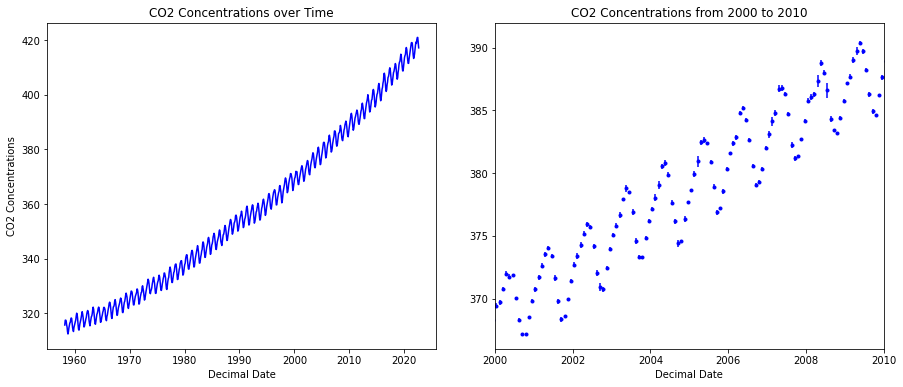

In [3]:
fig, ax = plt.subplots(1,2, figsize=(15, 6))

ax[0].plot(data['date'], data['co2'],c='b')
ax[0].set_xlabel('Decimal Date')
ax[0].set_ylabel('CO2 Concentrations')
ax[0].set_title('CO2 Concentrations over Time')

ax[1].errorbar(data['date'], data['co2'], data['error'], c='b', fmt='.')
ax[1].set_xlim(2000,2010)
ax[1].set_ylim(366,392)
ax[1].set_xlabel('Decimal Date')
ax[1].set_title('CO2 Concentrations from 2000 to 2010')
plt.subplots_adjust(wspace=0.15)
plt.show()



#### C.

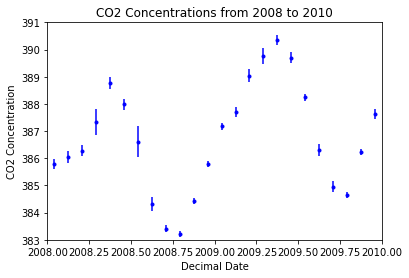

Magnitude of oscillation is ~4. The source of the oscillation is from the production of carbon dioxide from plants over the different seasons. Plant carbon dioxide production increases throughout the winter resulting in a peak in spring and decreases over the summer and is at its lowest in late fall. Oscillation is much larger than the errors so it is certainly a feature.


In [4]:
plt.errorbar(data['date'], data['co2'], data['error'], c='b', fmt='.')
plt.xlim(2008,2010)
plt.ylim(383,391)
plt.xlabel('Decimal Date')
plt.ylabel('CO2 Concentration')
plt.title('CO2 Concentrations from 2008 to 2010')
plt.subplots_adjust(wspace=0.15)
plt.show()

print('Magnitude of oscillation is ~4. The source of the oscillation is from the production of carbon dioxide from plants over the different seasons. Plant carbon dioxide production increases throughout the winter resulting in a peak in spring and decreases over the summer and is at its lowest in late fall. Oscillation is much larger than the errors so it is certainly a feature.')

#### D.

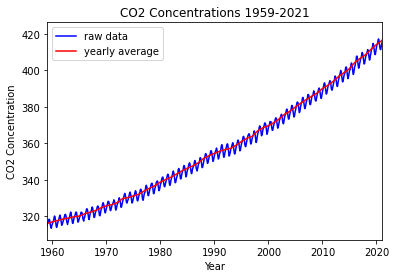

In [5]:
fullyrs = data[(data['date']>=1959) & (data['date']<2022)]
fullyrs.reset_index(drop=True, inplace=True)

yrs = np.arange(1959, 2022, 1)
co2avg = binned_statistic(fullyrs['date'], fullyrs['co2'], bins=63, range=(1959, 2022))[0]

plt.plot(data['date'], data['co2'],c='b', label='raw data')
plt.plot(yrs, co2avg, c='r', label='yearly average')
plt.xlim(1959,2021)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.title('CO2 Concentrations 1959-2021')
plt.legend()
plt.show()

### Part 2. Linear and Quadratic fits

#### A.

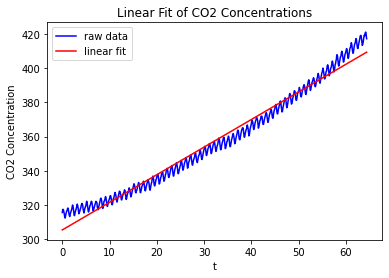

X^2: 21.757957936571692
a: 1.6117602448703747 +/- 0.01800862373871232
a: 305.5155426552686 +/- 0.6700603434295228


In [6]:
def linear(x,a,b):
    return a*x+b

data['t'] = data['date']-data['date'][0]

n = len(data['t'])
num_params = 2

(a_lin,b_lin),cov = curve_fit(f=linear, xdata=data['t'], ydata=data['co2'])
(a_err_lin,b_err_lin) = 2*sqrt(np.diag(cov))
fit = linear(data['t'],a_lin,b_lin)
sq_res_lin = (fit-data['co2'])**2
chisqr_lin = sum(sq_res_lin)/(n-num_params)

tfit = np.linspace(data['t'][0],data['t'].iat[-1],10000)
co2fit = linear(tfit,a_lin,b_lin)

plt.plot(data['t'], data['co2'], c='b', label='raw data')
plt.plot(tfit, co2fit, c='r', label='linear fit')
plt.xlabel('t')
plt.ylabel('CO2 Concentration')
plt.title('Linear Fit of CO2 Concentrations')
plt.legend()
plt.show()

print('X^2:',chisqr_lin)
print(f'a: {a_lin} +/- {a_err_lin}')
print(f'a: {b_lin} +/- {b_err_lin}')

#### B.

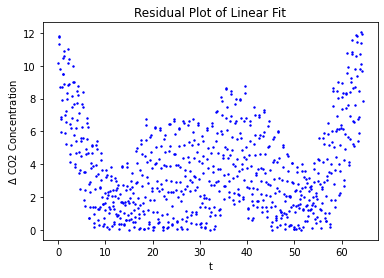

data not fit very well using the linear model, since the data is curved, the residuals are much to large at the beginning, middle and end of the dataset


In [7]:
res_lin = np.sqrt(sq_res_lin)

plt.scatter(data['t'], res_lin, c='b',s=2)
plt.xlabel('t')
plt.ylabel('$\Delta$ CO2 Concentration')
plt.title('Residual Plot of Linear Fit')
plt.show()

print('data not fit very well using the linear model, since the data is curved, the residuals are much to large at the beginning, middle and end of the dataset')

#### C.

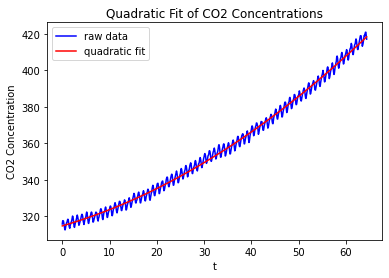

X^2: 4.982805227052321
a: 0.013192593069027984 +/- 0.0005174539383170488
a: 0.7618248156251911 +/- 0.03443299277747936
a: 314.63075069605406 +/- 0.4802567527483967


In [8]:
def quadratic(x,a,b,c):
    return a*x**2+b*x+c

data['t'] = data['date']-data['date'][0]

n = len(data['t'])
num_params = 3

(a_quad,b_quad,c_quad),cov = curve_fit(f=quadratic, xdata=data['t'], ydata=data['co2'])
(a_err_quad,b_err_quad,c_err_quad) = 2*sqrt(np.diag(cov))
fit = quadratic(data['t'],a_quad,b_quad,c_quad)
sq_res_quad = (fit-data['co2'])**2
chisqr_quad = sum(sq_res_quad)/(n-num_params)

tfit = np.linspace(data['t'][0],data['t'].iat[-1],10000)
co2fit = quadratic(tfit,a_quad,b_quad,c_quad)

plt.plot(data['t'], data['co2'], c='b', label='raw data')
plt.plot(tfit, co2fit, c='r', label='quadratic fit')
plt.xlabel('t')
plt.ylabel('CO2 Concentration')
plt.title('Quadratic Fit of CO2 Concentrations')
plt.legend()
plt.show()

print('X^2:',chisqr_quad)
print(f'a: {a_quad} +/- {a_err_quad}')
print(f'a: {b_quad} +/- {b_err_quad}')
print(f'a: {c_quad} +/- {c_err_quad}')

#### D.

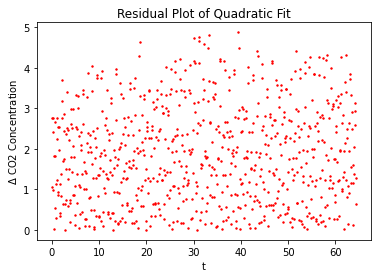

data is fit much better as the trend in the data clearly follows a quadratic model which is reflected in the much lower residual values


In [10]:
res_quad = np.sqrt(sq_res_quad)

plt.scatter(data['t'],res_quad,c='r',s=2)
plt.xlabel('t')
plt.ylabel('$\Delta$ CO2 Concentration')
plt.title('Residual Plot of Quadratic Fit')
plt.show()

print('data is fit much better as the trend in the data clearly follows a quadratic model which is reflected in the much lower residual values')

#### E.

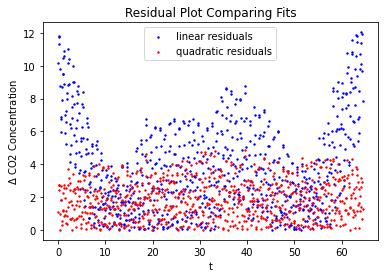

Linear X^2: 21.757957936571692
Quadratic X^2: 4.982805227052321
Much lower chi squared value for the quadratic model clearly indicates better fit 


In [14]:
plt.scatter(data['t'], res_lin, c='b',s=2,label='linear residuals')
plt.scatter(data['t'],res_quad,c='r',s=2,label='quadratic residuals')
plt.xlabel('t')
plt.ylabel('$\Delta$ CO2 Concentration')
plt.title('Residual Plot Comparing Fits')
plt.legend()
plt.show()

print('Linear X^2:',chisqr_lin)
print('Quadratic X^2:',chisqr_quad)
print('Much lower chi squared value for the quadratic model clearly indicates better fit ')

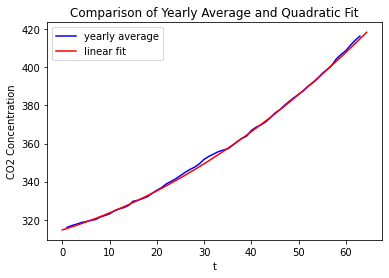

The only difference between the running average and fit is some noise in the average


In [12]:
plt.plot(yrs-1958, co2avg, c='b', label='yearly average')
plt.plot(tfit, co2fit, c='r', label='linear fit')
plt.xlabel('t')
plt.ylabel('CO2 Concentration')
plt.title('Comparison of Yearly Average and Quadratic Fit')
plt.legend()
plt.show()

print('The only difference between the running average and fit is some noise in the average')

### Part 3. Projecting future CO2 levels

#### A.

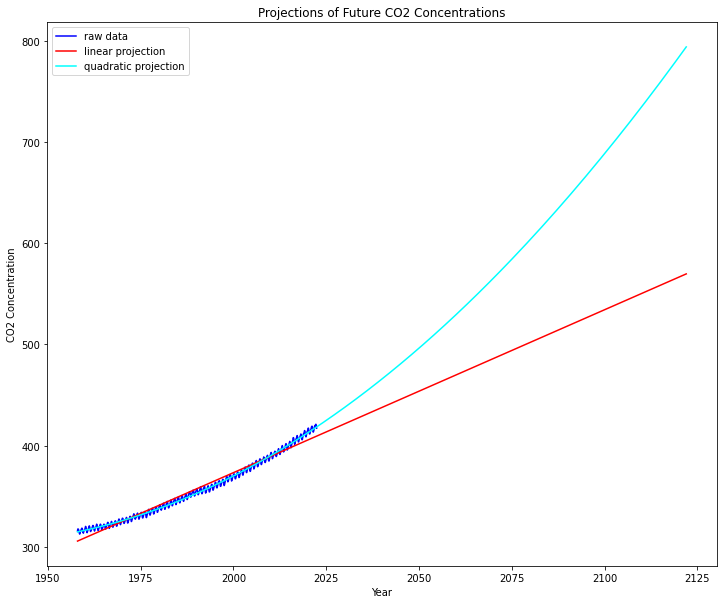

In [13]:
t100 = np.arange(0,165,1)
linfit_100 = linear(t100,a_lin,b_lin)
quadfit_100 = quadratic(t100,a_quad,b_quad,c_quad)

plt.figure(figsize=(12,10))
plt.plot(data['t']+1958, data['co2'], c='b', label='raw data')
plt.plot(t100+1958, linfit_100, c='r', label='linear projection')
plt.plot(t100+1958, quadfit_100, c='cyan', label='quadratic projection')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration')
plt.title('Projections of Future CO2 Concentrations')
plt.legend()
plt.show()